# Alireza Soroudi 
# alireza.soroudi@gmail.com 

In [1]:
from pyomo.environ import *
import numpy as np 
import pandas as pd
import random 
import matplotlib.pyplot as plt

In [2]:
Nprof = 8 
Nstudent = 50

P, Q, cap = {}, {}, {}
a= [j for j in range(1,1+Nstudent)]
b= [i for i in range(1,1+Nprof)]
for i in range(1,1+Nprof):
    cap[i] = random.randint(5,10)
    random.shuffle(a)
    for j in range(1,1+Nstudent):
        P[i,j]=a[j-1]

for j in range(1,1+Nstudent):
    random.shuffle(b)
    for i in range(1,1+Nprof):
        Q[i,j]=b[i-1]

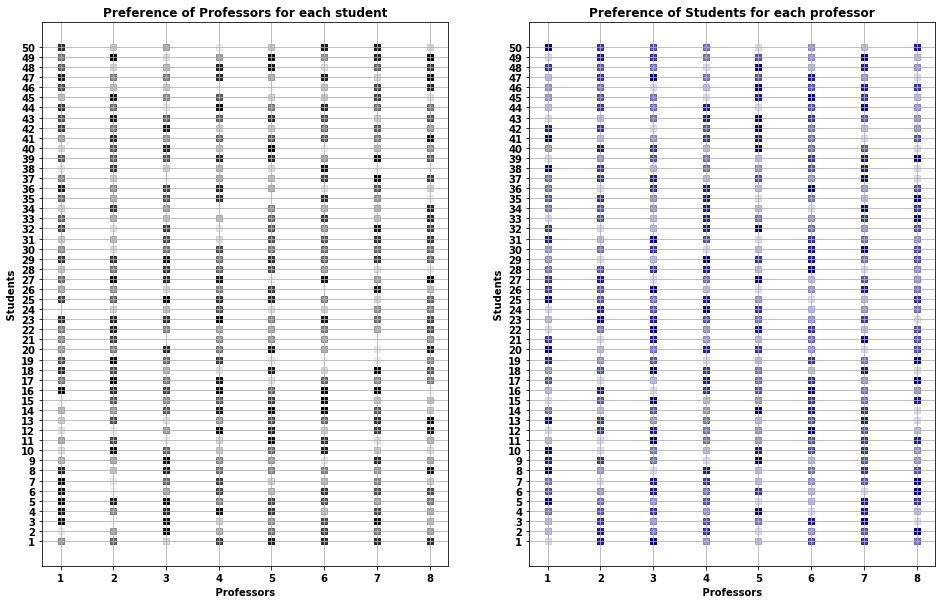

In [3]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
for (i,j) in P:
    plt.scatter(i,j, marker = 's', c='k', s= 30, alpha = P[i,j]/Nstudent)

plt.xticks(b, fontweight='bold')
plt.yticks(a, fontweight='bold')
plt.xlabel(' Professors ', fontweight='bold')
plt.ylabel(' Students ', fontweight='bold')
plt.title('Preference of Professors for each student', fontweight='bold')
plt.grid(zorder=-1)

plt.subplot(1,2,2)
for (i,j) in Q:
    plt.scatter(i,j, marker = 's', c='navy', s= 30, alpha = Q[i,j]/Nprof)

plt.xticks(b, fontweight='bold')
plt.yticks(a, fontweight='bold')
plt.xlabel(' Professors ', fontweight='bold')
plt.ylabel(' Students ', fontweight='bold')
plt.grid(zorder=-1)
plt.title('Preference of Students for each professor', fontweight='bold')
plt.savefig('DataofPreferences'+  '.jpg', format='jpg', dpi=400)
plt.show()

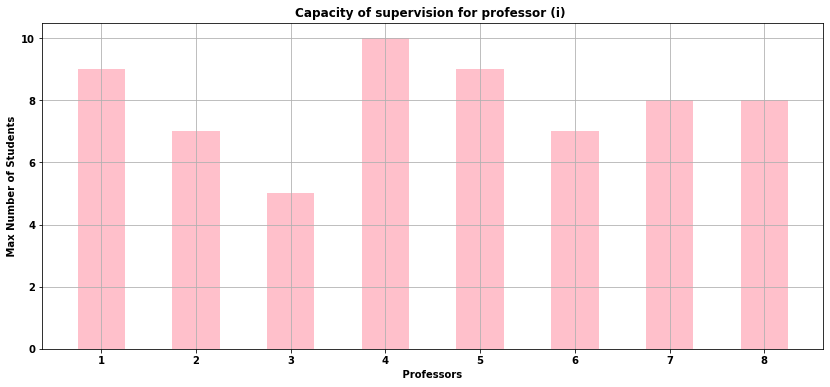

In [4]:
plt.figure(figsize=(14,6))
cap_prof= [cap[i] for i in range(1,1+Nprof)]
plt.bar(b,cap_prof,width=0.5, facecolor='pink')
plt.xticks(b, fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel(' Professors ', fontweight='bold')
plt.ylabel(' Max Number of Students ', fontweight='bold')
plt.title('Capacity of supervision for professor (i) ', fontweight='bold')
plt.grid()
plt.savefig('Profscapacity'+  '.jpg', format='jpg', dpi=400)
plt.show()

$$\begin{alignat}{2} 
\max_{U_{ij}} & \sum_{i,j} w_{ij}U_{ij} \\
&\forall_j    \sum_{i} U_{ij} = 1 \\
&\forall_i    \sum_{j} U_{ij} \leq Cap_i \\
\end{alignat}$$

The question is how to define the $w_{i,j}$

In [5]:
model = AbstractModel()
model.i = RangeSet(Nprof)
model.j = RangeSet(Nstudent)

model.Coef = Param(model.i, model.j, initialize = 0,mutable= True)

model.U = Var(model.i, model.j, initialize = 0,within=Binary)
def rule_c1(model,i):
    return sum(model.U[i,j] for j in model.j) <= cap[i]
model.C1 = Constraint(model.i, rule = rule_c1)

def rule_c2(model,j):
    return sum(model.U[i,j] for i in model.i) == 1
model.C2 = Constraint(model.j, rule = rule_c2)

def rule_of(model):
    return sum((model.Coef[i,j])*model.U[i,j] for j in model.j for i in model.i) 
model.obj = Objective(rule = rule_of, sense=maximize)

opt = SolverFactory('glpk')
instance = model.create_instance()

for (i,j) in P:
    instance.Coef[i,j] = P[i,j] + Q[i,j]
results = opt.solve(instance)
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

print('OF = ', round(value(instance.obj),4) )

feasible
OF =  2500.0


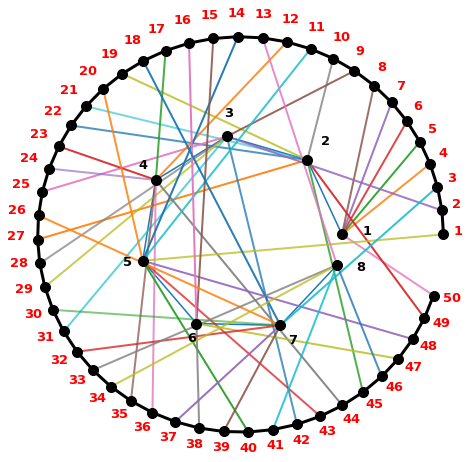

In [6]:
plt.figure(figsize=(8,8))
R = 10 
r = 20 
profx = [R+ R*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]
profy = [R+ R*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]


Tprofx = [R+ 1.2*R*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]
Tprofy = [R+ 1.2*R*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]



studentx = [R+ r*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]
studenty = [R+ r*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]

Tstudentx = [R+ 1.1*r*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]
Tstudenty = [R+ 1.1*r*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]


plt.plot(studentx,studenty, lw = 3, c = 'k')
plt.scatter(studentx,studenty, s = 100, c = 'k', zorder=400)

plt.plot(profx,profy)
plt.scatter(profx,profy, s = 100, c = 'k', zorder=200)

for i in instance.i:
    x0,y0 = Tprofx[i-1] ,Tprofy[i-1]
    plt.text(x0,y0, s = str(i), c = 'k', fontsize= 13, fontweight='bold')

    for j in instance.j:
        if value(instance.U[i,j])>0:
            x0,y0 = profx[i-1] ,profy[i-1]
            x1,y1 = studentx[j-1] ,studenty[j-1]
            LW = P[i,j]+Q[i,j]
            plt.plot([x0,x1], [y0,y1] , lw = 2, alpha=LW/60)
            x1,y1 = Tstudentx[j-1]-1 ,Tstudenty[j-1]-2
            plt.text(x1,y1+2, s = str(j), c = 'r', fontsize= 13, fontweight='bold')
plt.axis('off')
plt.savefig('PaddQPreferences'+  '.jpg', format='jpg', dpi=400)

plt.show()

Professor Average Score
1 45.0
2 44.57
3 43.57
4 42.86
5 45.71
6 46.5
7 43.86
8 43.6
Student Score
1 2.0
2 4.0
3 8.0
4 4.0
5 8.0
6 5.0
7 4.0
8 8.0
9 4.0
10 1.0
11 3.0
12 4.0
13 1.0
14 8.0
15 6.0
16 8.0
17 7.0
18 7.0
19 3.0
20 6.0
21 1.0
22 4.0
23 5.0
24 8.0
25 4.0
26 7.0
27 7.0
28 6.0
29 2.0
30 8.0
31 8.0
32 3.0
33 8.0
34 6.0
35 7.0
36 7.0
37 8.0
38 5.0
39 7.0
40 8.0
41 5.0
42 1.0
43 8.0
44 7.0
45 5.0
46 6.0
47 7.0
48 8.0
49 7.0
50 8.0


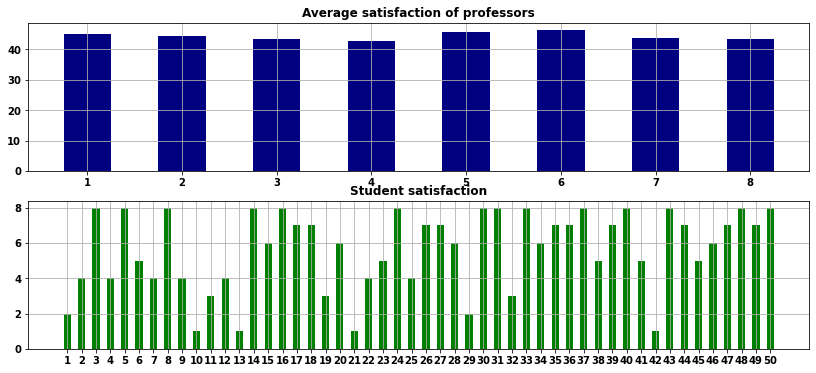

In [7]:
print('Professor Average Score')
Prof_satisfaction = []
Student_satisfaction = []
for i in instance.i:
    a= [P[i,j]*value(instance.U[i,j]) for j in instance.j if value(instance.U[i,j])>0 ]
    print(i,round(np.mean(a),2))
    Prof_satisfaction.append(np.mean(a))

print('Student Score')
for j in instance.j:
    a= [Q[i,j]*value(instance.U[i,j]) for i in instance.i ]
    print(j,round(np.sum(a),2))
    Student_satisfaction.append(np.sum(a))

profs = [i for i in instance.i]
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.bar(profs,Prof_satisfaction,width=0.5, facecolor='navy')
plt.xticks(b, fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Average satisfaction of professors', fontweight='bold')
plt.grid()

plt.subplot(2,1,2)
students = [j for j in instance.j]
plt.bar(students,Student_satisfaction,width=0.5, facecolor='green')
plt.xticks(students, fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Student satisfaction', fontweight='bold')
plt.grid()
plt.savefig('AvgCaseI'+  '.jpg', format='jpg', dpi=400)

plt.show()

In [8]:
for (i,j) in P:
    instance.Coef[i,j] = P[i,j] * Q[i,j]
results = opt.solve(instance)
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

print('OF = ', round(value(instance.obj),4) )

feasible
OF =  13881.0


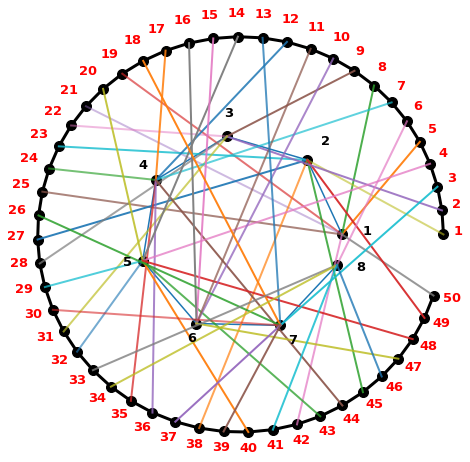

In [9]:
plt.figure(figsize=(8,8))
R = 10 
r = 20 
profx = [R+ R*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]
profy = [R+ R*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]

Tprofx = [R+ 1.2*R*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]
Tprofy = [R+ 1.2*R*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nprof)]

studentx = [R+ r*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]
studenty = [R+ r*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]

Tstudentx = [R+ 1.1*r*cos(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]
Tstudenty = [R+ 1.1*r*sin(theta) for theta in np.linspace(0, 1.9*np.pi , Nstudent)]


plt.plot(studentx,studenty, lw = 3, c = 'k')
plt.scatter(studentx,studenty, s = 100, c = 'k')

plt.plot(profx,profy)
plt.scatter(profx,profy, s = 100, c = 'k')

for i in instance.i:
    x0,y0 = Tprofx[i-1] ,Tprofy[i-1]
    plt.text(x0,y0, s = str(i), c = 'k', fontsize= 13, fontweight='bold')

    for j in instance.j:
        if value(instance.U[i,j])>0:
            x0,y0 = profx[i-1] ,profy[i-1]
            x1,y1 = studentx[j-1] ,studenty[j-1]
            LW = P[i,j]+Q[i,j]
            plt.plot([x0,x1], [y0,y1] , lw = 2, alpha=LW/60)
            x1,y1 = Tstudentx[j-1]-1 ,Tstudenty[j-1]-2
            plt.text(x1,y1+2, s = str(j), c = 'r', fontsize= 13, fontweight='bold')
plt.axis('off')
plt.savefig('PprodQPreferences'+  ' .jpg', format='jpg', dpi=400)

plt.show()

Professor Average Score
1 36.29
2 41.17
3 37.6
4 40.71
5 41.62
6 44.0
7 43.0
8 40.4
Student Score
1 7.0
2 4.0
3 8.0
4 8.0
5 8.0
6 8.0
7 6.0
8 8.0
9 4.0
10 5.0
11 5.0
12 4.0
13 7.0
14 8.0
15 6.0
16 8.0
17 7.0
18 7.0
19 7.0
20 6.0
21 6.0
22 8.0
23 8.0
24 8.0
25 8.0
26 7.0
27 7.0
28 6.0
29 6.0
30 8.0
31 8.0
32 8.0
33 8.0
34 6.0
35 7.0
36 7.0
37 8.0
38 6.0
39 7.0
40 8.0
41 5.0
42 7.0
43 8.0
44 7.0
45 5.0
46 6.0
47 7.0
48 8.0
49 7.0
50 8.0


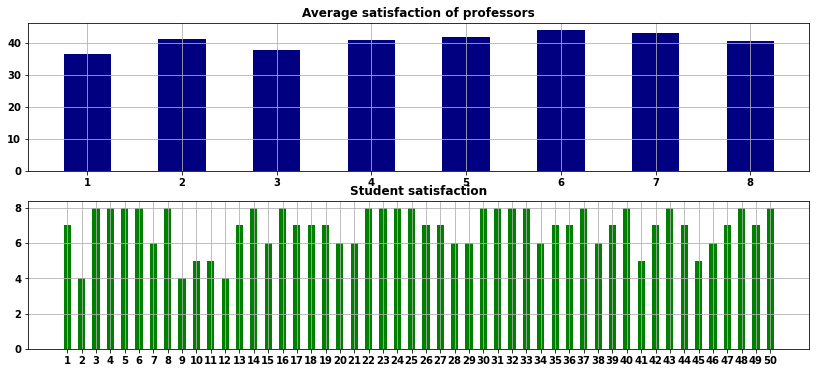

In [10]:
print('Professor Average Score')
Prof_satisfaction = []
Student_satisfaction = []
for i in instance.i:
    a= [P[i,j]*value(instance.U[i,j]) for j in instance.j if value(instance.U[i,j])>0 ]
    print(i,round(np.mean(a),2))
    Prof_satisfaction.append(np.mean(a))

print('Student Score')
for j in instance.j:
    a= [Q[i,j]*value(instance.U[i,j]) for i in instance.i ]
    print(j,round(np.sum(a),2))
    Student_satisfaction.append(np.sum(a))

profs = [i for i in instance.i]
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.bar(profs,Prof_satisfaction,width=0.5, facecolor='navy')
plt.xticks(b, fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Average satisfaction of professors', fontweight='bold')
plt.grid()

plt.subplot(2,1,2)
students = [j for j in instance.j]
plt.bar(students,Student_satisfaction,width=0.5, facecolor='green')
plt.xticks(students, fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Student satisfaction', fontweight='bold')
plt.grid()
plt.savefig('AvgCaseII'+  '.jpg', format='jpg', dpi=400)

plt.show()

In [11]:
model = AbstractModel()
model.i = RangeSet(Nprof)
model.j = RangeSet(Nstudent)

model.Coef = Param(model.i, model.j, initialize = 0,mutable= True)
model.limit = Param(initialize = 0,mutable= True)

model.U = Var(model.i, model.j, initialize = 0,within=Binary)

model.obj_prof = Var(initialize = 0,within=NonNegativeReals)
model.obj_students = Var(initialize = 0,within=NonNegativeReals)

def rule_c1(model,i):
    return sum(model.U[i,j] for j in model.j) <= cap[i]
model.C1 = Constraint(model.i, rule = rule_c1)

def rule_c2(model,j):
    return sum(model.U[i,j] for i in model.i) == 1
model.C2 = Constraint(model.j, rule = rule_c2)

def rule_c3(model):
    return sum(Q[i,j]*model.U[i,j] for i in model.i for j in model.j) == model.obj_students 
model.C3 = Constraint(rule = rule_c3)

def rule_c4(model):
    return sum(P[i,j]*model.U[i,j] for i in model.i for j in model.j) == model.obj_prof 
model.C4 = Constraint(rule = rule_c4)


def rule_c5(model):
    return model.obj_students >= model.limit 
model.C5 = Constraint(rule = rule_c5)


def rule_of(model):
    return sum((model.Coef[i,j])*model.U[i,j] for j in model.j for i in model.i) 
model.obj = Objective(rule = rule_of, sense=maximize)

opt = SolverFactory('glpk')
instance = model.create_instance()# solves and updates instance

In [12]:
for (i,j) in P:
    instance.Coef[i,j] =  P[i,j]
results = opt.solve(instance)
print('OF1_{student}= ' , round(value(instance.obj_students),4) )
print('OF2_{prof} = ', round(value(instance.obj_prof),4) )
OF1min= value(instance.obj_students)
OF2max= value(instance.obj_prof)

OF1_{student}=  211.0
OF2_{prof} =  2256.0


In [13]:
for (i,j) in Q:
    instance.Coef[i,j] =  Q[i,j]
results = opt.solve(instance)
print('OF1_{student}= ' , round(value(instance.obj_students),4) )
print('OF2_{prof} = ', round(value(instance.obj_prof),4) )
OF2min= value(instance.obj_prof)
OF1max= value(instance.obj_students)


OF1_{student}=  398.0
OF2_{prof} =  1187.0


In [14]:
N = 30 
report = {}
# Maximize the prof objective
for (i,j) in P:
    instance.Coef[i,j] =  P[i,j]
    
for counter in range(N):
    instance.limit = (OF1max-OF1min)*counter/(N-1) + OF1min
    results = opt.solve(instance)
    report[counter,'OF1'] = round(value(instance.obj_students),4)
    report[counter,'OF2'] = round(value(instance.obj_prof),4)
    #print(value(instance.limit)  , 'OF1_{student}= ' , round(value(instance.obj_students),4) , 'OF2_{prof} = ', round(value(instance.obj_prof),4) )
OF1 = [report[counter,'OF1'] for counter in range(N)]
OF2 = [report[counter,'OF2'] for counter in range(N)]


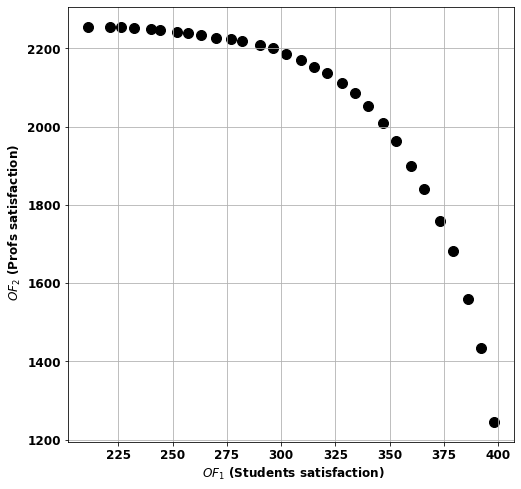

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(OF1,OF2, s = 100, c = 'k')

plt.xlabel(' $OF_1$ (Students satisfaction)', fontweight='bold', fontsize=12)
plt.ylabel(' $OF_2$ (Profs satisfaction)', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.grid()
plt.savefig('Paretooptimalfront'+  '.jpg', format='jpg', dpi=400)
plt.show()